In [1]:
import pycaret

In [2]:
from pycaret.regression import *

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# 한글깨짐 해결
plt.rcParams['font.family'] ="Malgun Gothic"

In [5]:
import numpy as np 
import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [6]:
data = pd.read_csv("../autoML/automldata.csv", index_col = 0 )

In [7]:
train = data[data['date'] < '2020-09-01']
test = data[data['date'] >= '2020-09-01']

In [8]:
train = train[train['품목'] == '백다다기']
test = test[test['품목'] == '백다다기']
cat_f = ['주산지','요일']


setting = setup( data = train ,    target = '1_week' , categorical_features = cat_f,
               ignore_features = ['2_week','4_week','month','품목'] , normalize = True , session_id = 123)

,Description,Value
0,session_id,123
1,Target,1_week
2,Original Data,"(1445, 104)"
3,Missing Values,False
4,Numeric Features,96
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1011, 118)"


In [9]:
best = compare_models(sort = 'MAE' , exclude = ['omp','ard','par','ransac','huber'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,264.8955,191709.6804,432.6104,0.6182,0.8486,0.1297,1.4680
lightgbm,Light Gradient Boosting Machine,265.5886,193995.5636,433.0367,0.6181,0.8469,0.1301,0.5120
rf,Random Forest Regressor,287.0521,210481.7577,451.4250,0.5847,0.8559,0.1435,2.4610
gbr,Gradient Boosting Regressor,304.1466,237767.7193,477.8836,0.5292,0.8674,0.1505,1.0550
br,Bayesian Ridge,326.9953,250052.5495,494.5444,0.5049,0.8744,0.1656,0.0210
lasso,Lasso Regression,328.6159,251777.7219,497.2427,0.5005,0.8760,0.1664,0.0260
knn,K Neighbors Regressor,330.2275,245066.0078,490.1872,0.5127,0.8589,0.1647,0.0740
ridge,Ridge Regression,333.4764,257218.2172,502.6518,0.4885,0.8781,0.1691,0.0120
llar,Lasso Least Angle Regression,340.9044,259982.6839,503.8773,0.4882,0.8745,0.1758,0.4540
lr,Linear Regression,341.8722,267185.2562,512.2006,0.4678,0.8822,0.1736,0.4760


### Extra Trees Regressor

In [10]:
model = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,227.3084,117399.5276,342.6361,0.6924,0.1906,0.1306
1,263.2927,198191.4217,445.1870,0.6376,0.7958,0.1278
2,287.4936,309566.5626,556.3871,0.3163,1.3354,0.1299
3,252.6340,216546.3701,465.3454,0.5606,1.1139,0.1061
4,283.4857,259714.6741,509.6221,0.6224,0.8139,0.1298
5,261.0365,157087.7751,396.3430,0.6940,1.0436,0.1442
6,305.9420,238271.1236,488.1302,0.4864,1.8053,0.1264
7,246.6903,132343.6097,363.7906,0.7342,0.1768,0.1413
8,264.1781,136561.4646,369.5422,0.7107,0.1751,0.1338
9,256.8941,151414.2745,389.1199,0.7275,1.0354,0.1267


In [11]:
tuned_model = tune_model(model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,232.7471,90900.7207,301.4975,0.7618,0.1753,0.1420
1,300.4388,195116.1802,441.7196,0.6432,0.7943,0.1530
2,305.4108,278737.5215,527.9560,0.3844,1.3257,0.1470
3,292.7281,259890.5954,509.7947,0.4727,1.1132,0.1247
4,327.6041,283152.8272,532.1211,0.5883,0.8116,0.1564
5,283.0485,181158.0164,425.6266,0.6472,1.0667,0.1575
6,336.6415,280909.6541,530.0091,0.3945,1.8273,0.1417
7,272.3638,153875.8679,392.2701,0.6909,0.2011,0.1600
8,264.5862,118827.4247,344.7135,0.7483,0.1707,0.1397
9,285.0174,174239.9977,417.4206,0.6864,1.0336,0.1435


In [12]:
print(tuned_model)

ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse', max_depth=9,
                    max_features=1.0, max_leaf_nodes=None, max_samples=None,
                    min_impurity_decrease=0.1, min_impurity_split=None,
                    min_samples_leaf=4, min_samples_split=7,
                    min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                    oob_score=False, random_state=123, verbose=0,
                    warm_start=False)


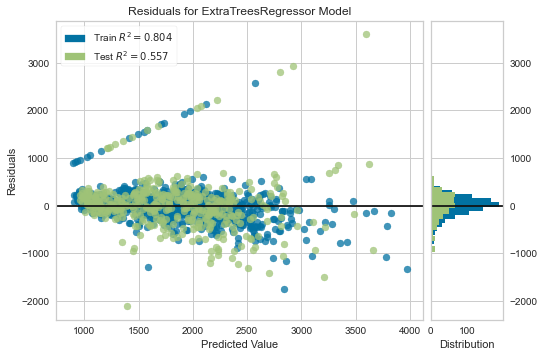

In [13]:
plot_model(tuned_model, plot = 'residuals')

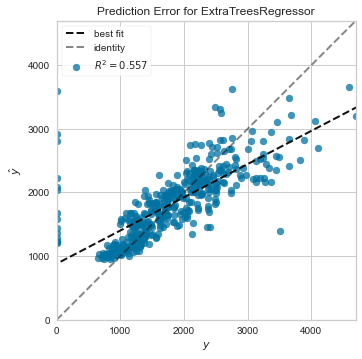

In [14]:
plot_model(tuned_model, plot = 'error')

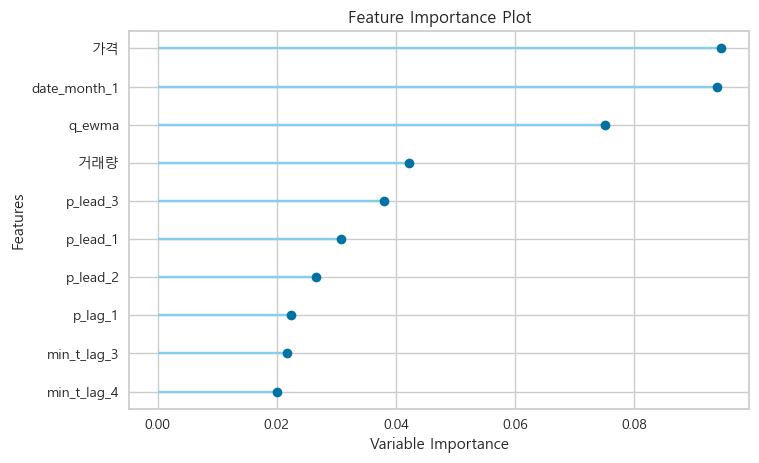

In [17]:
plot_model(tuned_model, plot = 'feature')

In [18]:
predict_model(tuned_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,327.5512,278009.1675,527.2657,0.5574,1.3591,0.1487


,가격,거래량,경유가격,농산물,temp,max_Temp,min_Temp,wind,rain,dif_Temp,...,date_month_8,date_month_9,date_weekday_0,date_weekday_2,date_weekday_3,date_weekday_6,date_is_month_end_0,date_is_month_start_0,1_week,Label
0,1.408682,-0.479314,-0.875727,0.372076,0.921888,0.975385,0.874111,-1.050387,-0.257064,0.225891,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1161.0,1684.631667
1,0.293010,-0.296532,1.333393,1.705273,1.561672,1.541340,1.627798,-0.664226,-0.257064,-0.307104,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1789.0,2042.187744
2,-1.048170,0.764432,1.104523,0.237052,0.518331,0.869868,-0.002050,-0.664226,-0.257064,2.307111,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1057.0,1100.613901
3,1.110477,-0.874496,0.982171,-0.215213,-1.115580,-1.307620,-0.915895,-0.278066,-0.162866,-0.992384,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2585.0,2359.039096
4,-0.395383,-0.038686,0.070496,0.659166,-0.731710,-0.597778,-0.934738,-0.278066,-0.257064,0.936552,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1436.0,1548.944453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,-1.239555,0.005554,-0.751834,-0.510168,0.390374,0.323098,0.516110,0.108094,-0.257064,-0.535531,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1479.0,1505.930858
430,0.628305,-0.724726,-0.892692,0.372076,0.744717,0.409430,1.062533,-1.050387,-0.257064,-1.779187,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1540.0,1755.115227
431,0.782600,-0.774634,-1.936693,-0.272892,-1.026995,-1.288435,-0.878211,-1.050387,-0.257064,-1.043146,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2330.0,2147.767130
432,-1.028883,1.166308,-0.147785,-0.911307,0.597074,0.745166,0.242898,0.108094,-0.257064,1.317263,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,740.0,958.539812


In [19]:
final_ml = finalize_model(tuned_model)
print(final_ml)

ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse', max_depth=9,
                    max_features=1.0, max_leaf_nodes=None, max_samples=None,
                    min_impurity_decrease=0.1, min_impurity_split=None,
                    min_samples_leaf=4, min_samples_split=7,
                    min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                    oob_score=False, random_state=123, verbose=0,
                    warm_start=False)


In [20]:
unseen_pred = predict_model(final_ml, data = test)
unseen_pred.head()

,date,요일,품목,가격,거래량,주산지,경유가격,농산물,temp,max_Temp,...,w_lag_2m,w_lead_1,w_lead_2,w_lead_3,w_lead_4,p_lead_1,p_lead_2,p_lead_3,p_lead_4,Label
25967,2020-09-01,화요일,백다다기,2085.0,327378.0,충남,1162.21,139.93,25.1,30.5,...,0.2,0.8,0.0,0.0,0.1,261191.1,0.0,248011.1,250715.2,2089.409507
25968,2020-09-02,수요일,백다다기,2386.0,307571.5,충남,1161.98,139.93,23.3,24.5,...,0.0,0.4,0.8,0.0,0.0,200972.0,261191.1,0.0,248011.1,2026.305840
25969,2020-09-03,목요일,백다다기,2732.0,262404.0,충남,1161.93,139.93,22.0,25.2,...,0.4,0.1,0.4,0.8,0.0,234420.1,200972.0,261191.1,0.0,1955.481131
25970,2020-09-04,금요일,백다다기,2889.0,250715.2,충남,1161.61,139.93,22.2,28.2,...,1.1,0.1,0.1,0.4,0.8,199071.3,234420.1,200972.0,261191.1,1958.318140
25971,2020-09-05,토요일,백다다기,3032.0,248011.1,충남,1161.40,139.93,20.5,25.3,...,0.1,0.3,0.1,0.1,0.4,239852.7,199071.3,234420.1,200972.0,1911.842727


In [21]:
pred = unseen_pred[['date','1_week','Label']]
pred_0 = pred[pred['1_week'] > 0 ]

In [22]:
score = np.absolute(np.subtract(pred_0['1_week'], pred_0['Label']))/ pred_0['1_week']
score.mean()

0.40921593796061095

<AxesSubplot:xlabel='date', ylabel='1_week'>

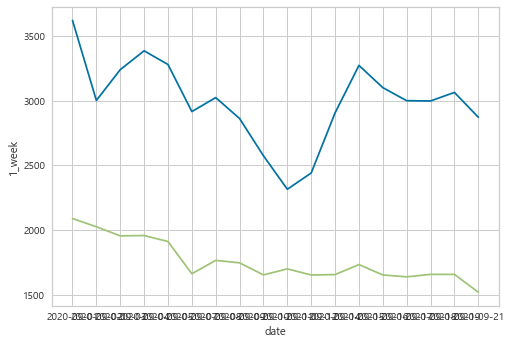

In [23]:
sns.lineplot(x= 'date', y= '1_week', data = pred_0)
sns.lineplot(x= 'date',y = 'Label', data = pred_0)